In [38]:
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
df = pd.read_csv('day.csv')

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

In [39]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
df.season.unique()

array([1, 2, 3, 4])

In [41]:
df[['casual', 'cnt']].corr()

,casual,cnt
casual,1.000000,0.672804
cnt,0.672804,1.000000


In [42]:
df= df.drop(columns=['casual','registered','instant','dteday','mnth','yr'])

In [43]:
df

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...
726,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [44]:
target = 'cnt'
y = df[target]

In [45]:
X = df.copy()
X = X.drop(target, axis=1)

X =pd.get_dummies(X)

In [48]:
X

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...
726,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [46]:
model = linear_model.LinearRegression().fit(X,y)

In [49]:
predicciones = model.predict(X)

In [50]:
r2_score(y_pred=predicciones, y_true=y)

0.5271377890310007

In [51]:
calibracion = pd.DataFrame({
    'predicciones':predicciones,
    'real':y
})

In [52]:
calibracion['bins']=pd.qcut(calibracion['predicciones'], q = 10, labels=False)+1

In [53]:
grouped_calibracion = calibracion.groupby('bins').mean()
grouped_calibracion['error']=(grouped_calibracion.predicciones - grouped_calibracion.real)/grouped_calibracion.predicciones

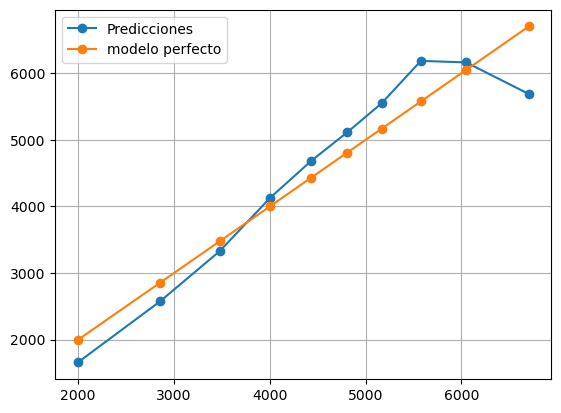

In [54]:
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.real.values, marker = "o", label="Predicciones")
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.predicciones.values, marker = "o", label = "modelo perfecto")
plt.legend()
plt.grid()